In [129]:
import matplotlib.pyplot as plt
import ds_functions as ds
import pandas as pd
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import scipy.stats as _stats
import numpy as np
import config as cfg

register_matplotlib_converters()

# Heart Failure Dataset

In [130]:
data = pd.read_csv('data/heart_failure_clinical_records_dataset.csv')

## Dimensionality

In [131]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


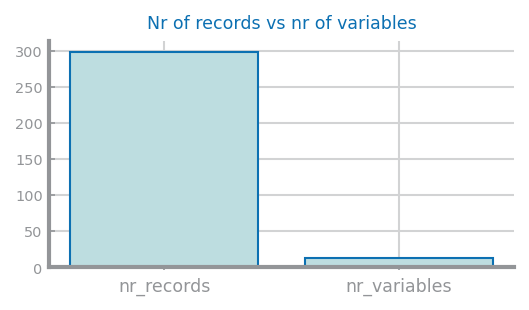

In [132]:
plt.figure(figsize=(4,2))
values = { 'nr_records': data.shape[0], 'nr_variables': data.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr of variables')

In [133]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [134]:
data['sex'] = data['sex'].astype('category')
for c in ['anaemia', 'diabetes', 'high_blood_pressure', 'smoking', 'DEATH_EVENT']:
    data[c] = data[c].astype('bool')

data['sex'] = data['sex'].map({1: 'Male', 0: 'Female'})

data.dtypes

age                          float64
anaemia                         bool
creatinine_phosphokinase       int64
diabetes                        bool
ejection_fraction              int64
high_blood_pressure             bool
platelets                    float64
serum_creatinine             float64
serum_sodium                   int64
sex                         category
smoking                         bool
time                           int64
DEATH_EVENT                     bool
dtype: object

dict_values([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

<Figure size 600x450 with 0 Axes>

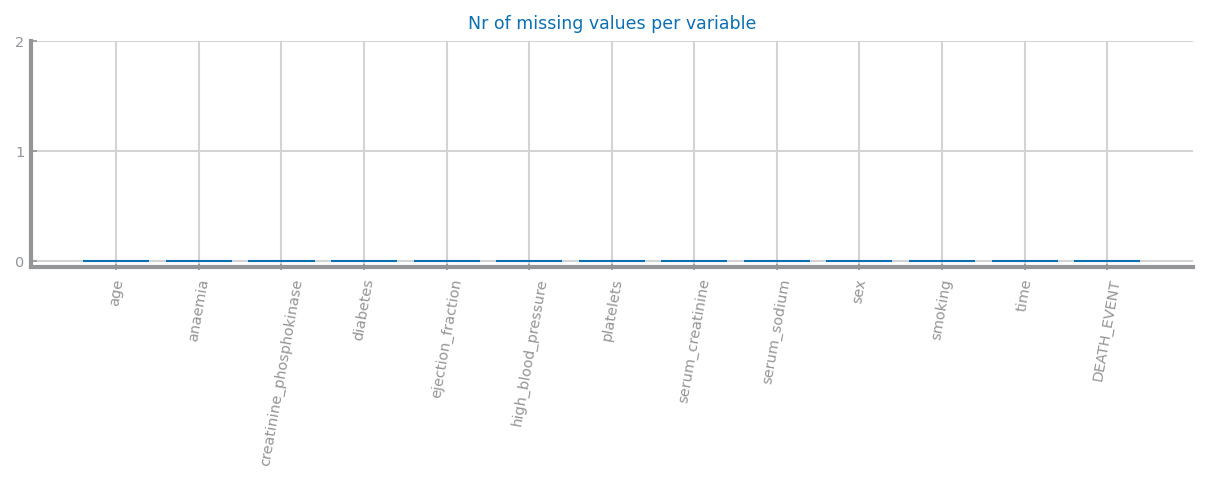

In [135]:
plt.figure()
mv = {var: data[var].isna().sum() for var in data}
plt.figure(figsize=(10, 2))
plt.bar(mv.keys(), mv.values(), edgecolor=cfg.LINE_COLOR, color=cfg.FILL_COLOR)
plt.title('Nr of missing values per variable')
plt.yticks([0, 1, 2])
plt.xticks(rotation=80)

mv.values()

## Granularity

## Distribution

In [136]:
data.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


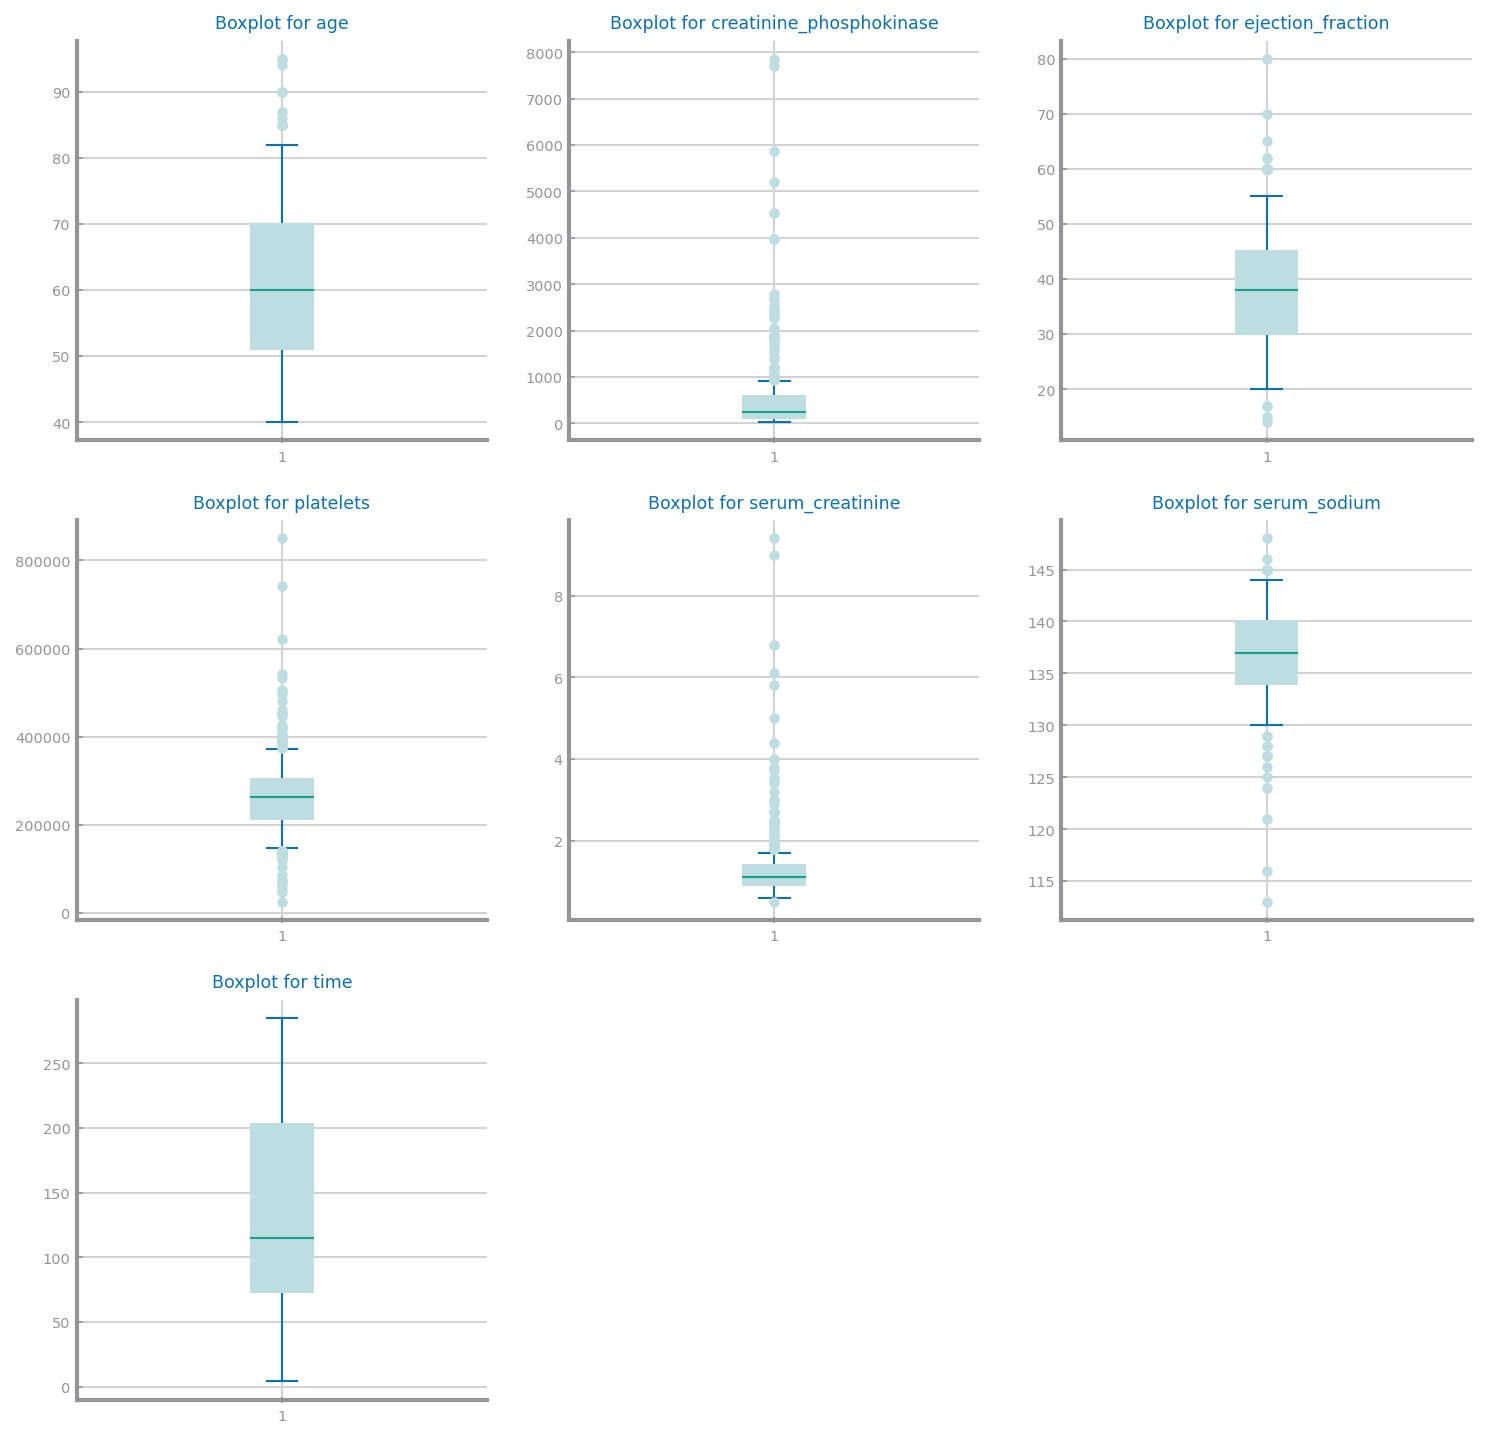

In [137]:
numeric_vars = data.select_dtypes(include=['float64','int64']).columns
rows, cols = ds.choose_grid(len(numeric_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0
for n in range(len(numeric_vars)):
    axs[i, j].set_title('Boxplot for %s'%vars[n])
    axs[i, j].boxplot(data[vars[n]].dropna().values)
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

while n <= len(numeric_vars):
    axs[i, j].axis('off')
    n = n + 1
    i, j = (i + 1, 0) if n % cols == 0 else (i, j + 1)

plt.show()

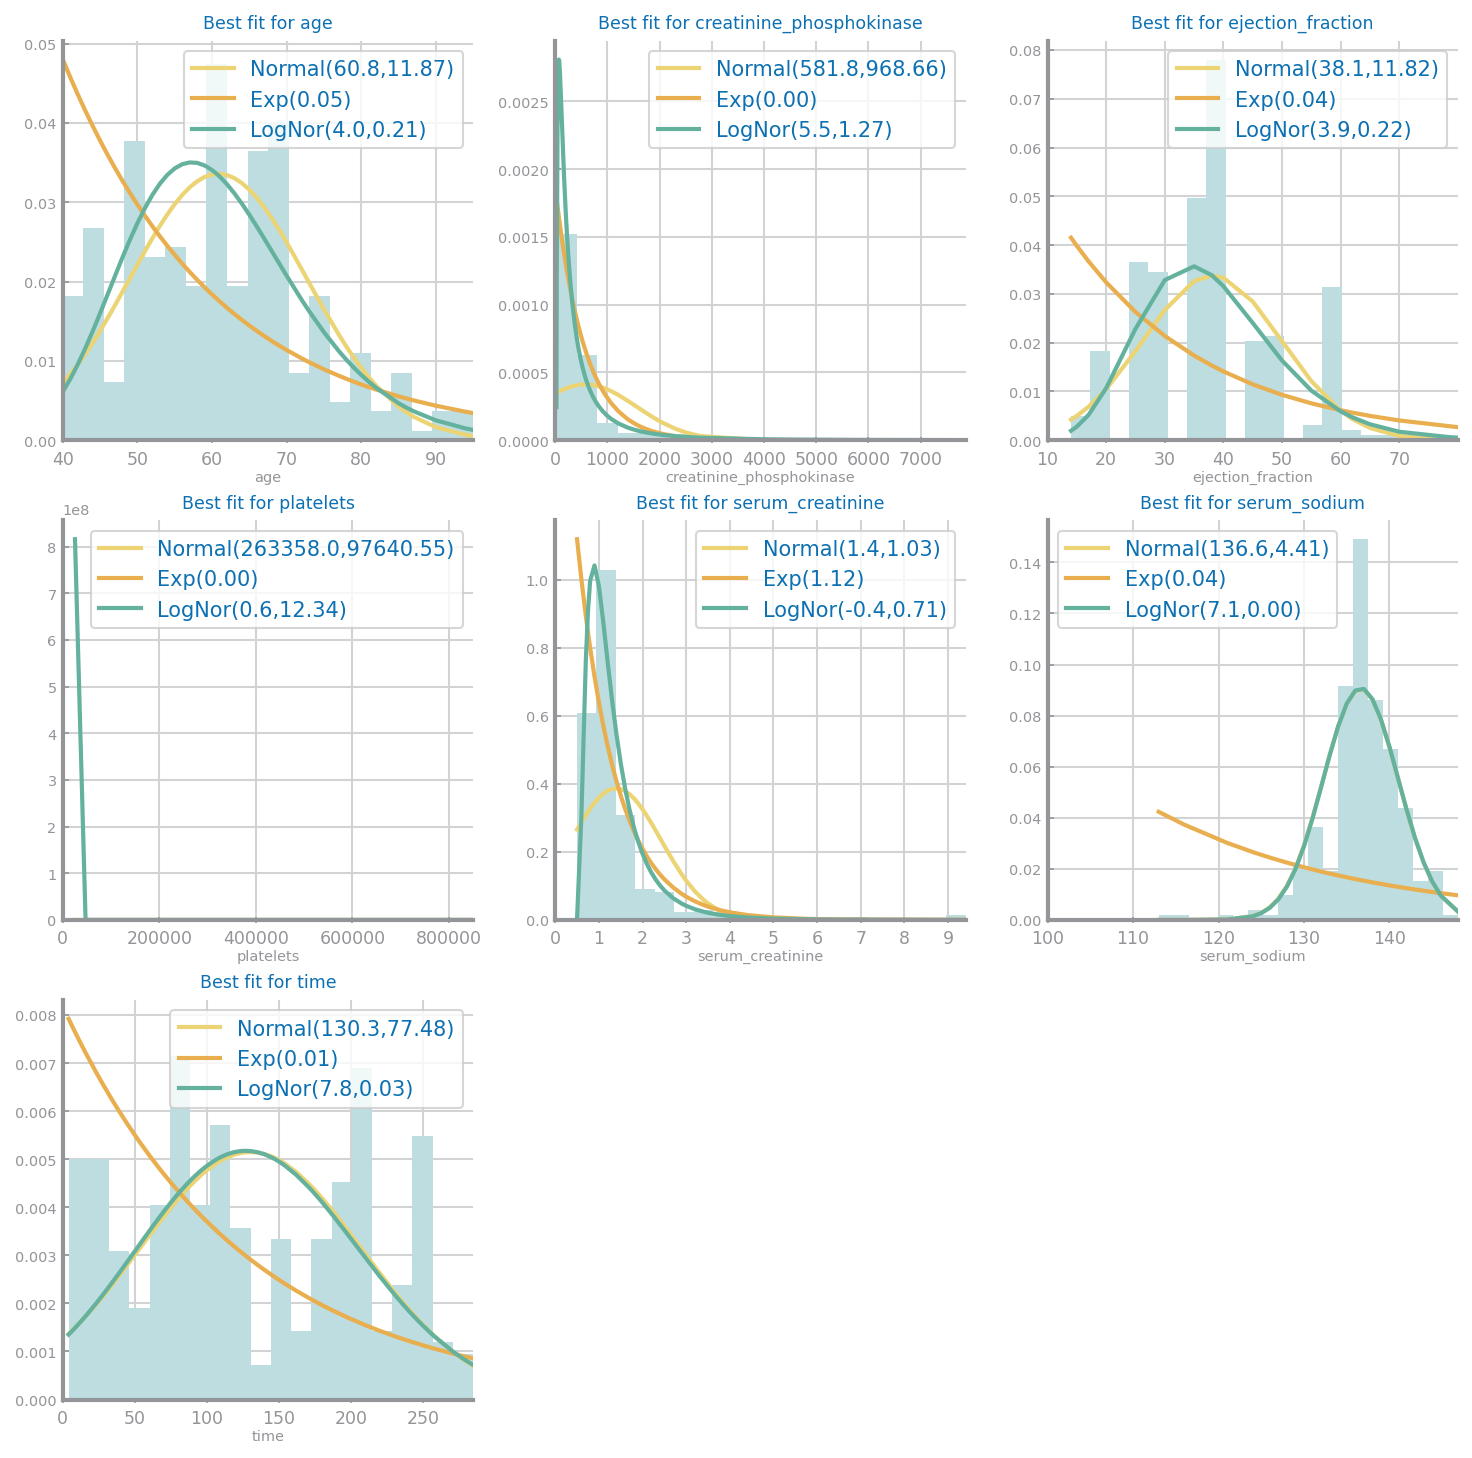

In [138]:
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT))
i, j = 0, 0

for n in range(len(numeric_vars)):
    new_data = data[numeric_vars[n]].dropna()
    ds.histogram_with_distributions(axs[i, j], new_data, numeric_vars[n])

    # Fix plot ticks
    min, max, interval = 0, 0, 0
    if numeric_vars[n] == "age":
        min = int(new_data.min())
        max = int(new_data.max())
        interval = 10
    elif numeric_vars[n] == "creatinine_phosphokinase":
        max = 8000
        interval = 1000
    elif numeric_vars[n] == "ejection_fraction":
        min = 10
        max = 80
        interval = 10
    elif numeric_vars[n] == "platelets":
        max = 850000
        interval = 200000
    elif numeric_vars[n] == "serum_creatinine":
        max = 10
        interval = 1
    elif numeric_vars[n] == "serum_sodium":
        min = 100
        max = 150
        interval = 10
    else:
        max = 300
        interval = 50

    tick_list = list(range(min, max, interval))
    axs[i, j].set_xticks(tick_list)
    axs[i, j].set_xticklabels(tick_list)
    
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

while n <= len(numeric_vars):
    axs[i, j].axis('off')
    n = n + 1
    i, j = (i + 1, 0) if n % cols == 0 else (i, j + 1)

plt.show()

In [139]:
data.describe(include=['bool','category'])

,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
count,299,299,299,299,299,299
unique,2,2,2,2,2,2
top,False,False,False,Male,False,False
freq,170,174,194,194,203,203


In [140]:
symbolic_vars = data.select_dtypes(include=['bool','category']).columns
for v in symbolic_vars:
    print(v, data[v].unique())

anaemia [False  True]
diabetes [False  True]
high_blood_pressure [ True False]
sex ['Male', 'Female']
Categories (2, object): ['Male', 'Female']
smoking [False  True]
DEATH_EVENT [ True False]


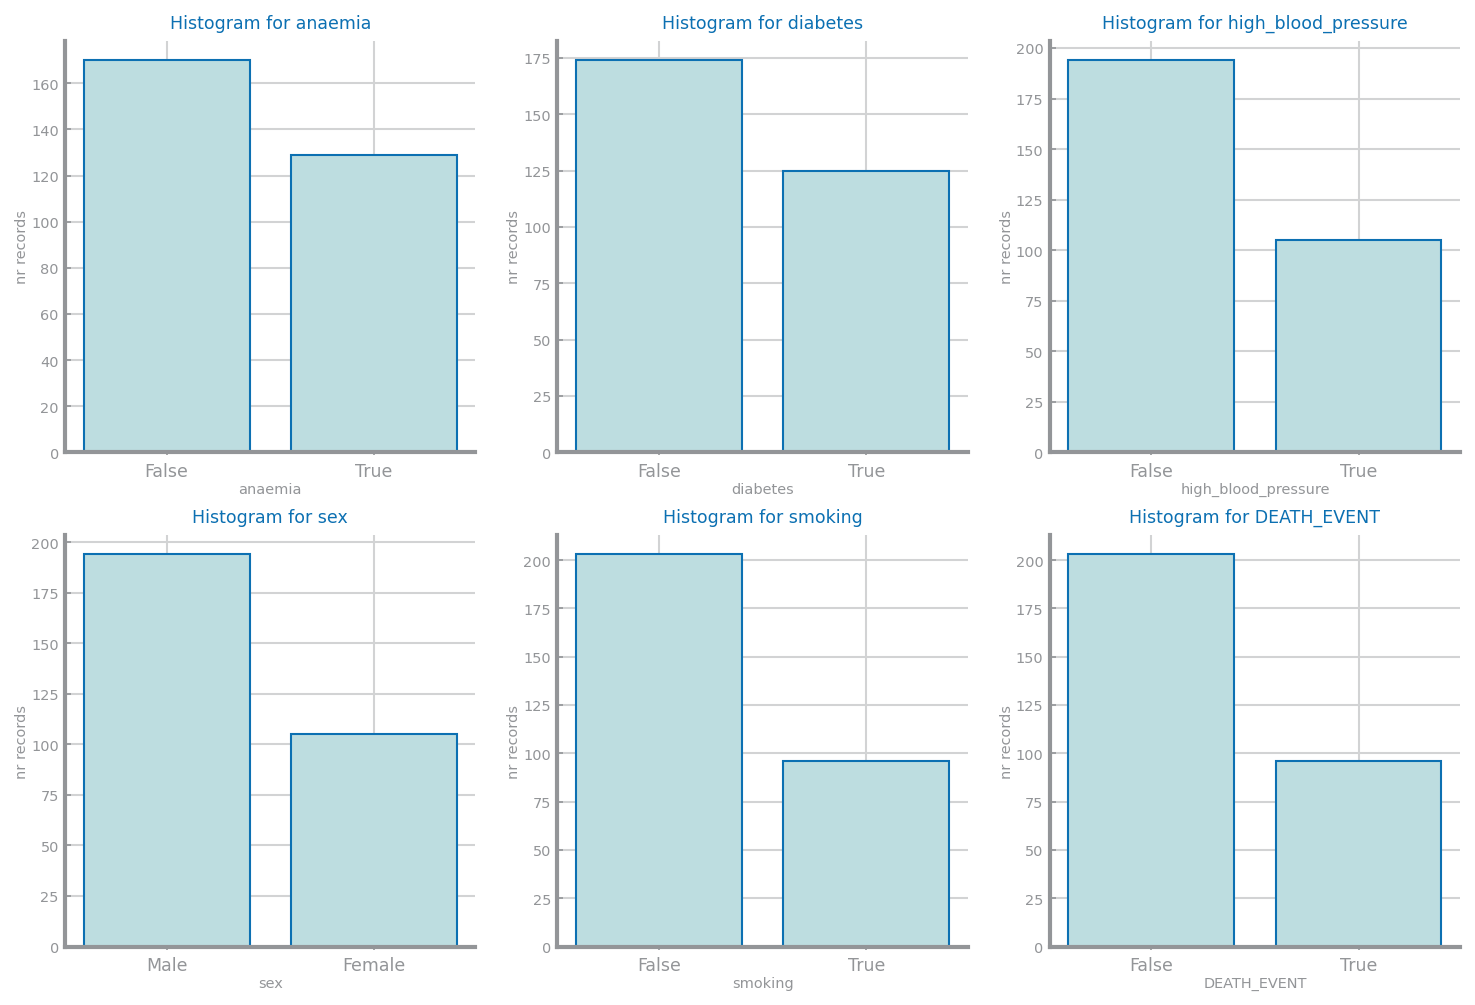

In [141]:
rows, cols = ds.choose_grid(len(symbolic_vars))
fig, axs = plt.subplots(rows, cols, figsize=(cols*ds.HEIGHT, rows*ds.HEIGHT), squeeze=False)
i, j = 0, 0

for n in range(len(symbolic_vars)):
    counts = data[symbolic_vars[n]].value_counts()
    counts_list = counts.index.to_list()

    if data[symbolic_vars[n]].dtype == np.bool:
        counts_list = list(map(lambda x: str(x), counts_list))
        
    ds.bar_chart(counts_list, counts.values, ax=axs[i, j], title='Histogram for %s'%symbolic_vars[n],
                 xlabel=symbolic_vars[n], ylabel='nr records')

    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)

plt.show()

# Toxicity Dataset

In [142]:
data2 = pd.read_csv('data/qsar_oral_toxicity.csv', sep=';', header=None)

## Dimensionality

In [143]:
data2

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,negative
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8987,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8988,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,negative
8989,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,negative
8990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative


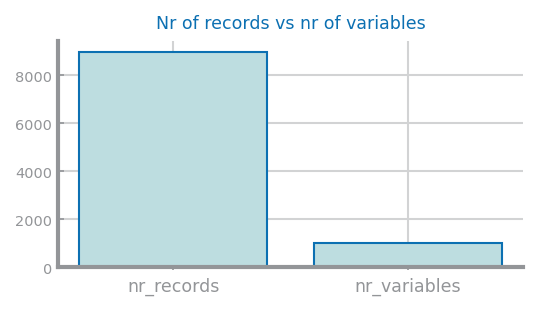

In [144]:
plt.figure(figsize=(4,2))
values = { 'nr_records': data2.shape[0], 'nr_variables': data2.shape[1]}
ds.bar_chart(values.keys(), values.values(), title='Nr of records vs nr of variables')

In [145]:
data2.dtypes

0        int64
1        int64
2        int64
3        int64
4        int64
         ...  
1020     int64
1021     int64
1022     int64
1023     int64
1024    object
Length: 1025, dtype: object

In [76]:
## Should we?
for c in data2.columns:
    data2[c] = data2[c].astype('bool')
data2.rename(columns={1024: 'toxic'}, inplace=True)
data2.dtypes

0        bool
1        bool
2        bool
3        bool
4        bool
         ... 
1020     bool
1021     bool
1022     bool
1023     bool
toxic    bool
Length: 1025, dtype: object

In [77]:
# plt.figure()
# mv = {str(var): data[var].isna().sum() for var in data}
# plt.figure(figsize=(10, 2))
# plt.bar(mv.keys(), mv.values(), edgecolor=cfg.LINE_COLOR, color=cfg.FILL_COLOR)
# plt.title('Nr of missing values per variable')
# plt.yticks([0, 1, 2])
# plt.xticks(rotation=80)

## Granularity

## Distribution